# Machine Learning from disaster

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<AxesSubplot:xlabel='Survived', ylabel='count'>

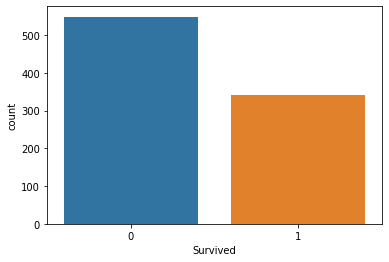

In [5]:
sns.countplot(x = 'Survived', data = train)

Most people did not survive

<AxesSubplot:xlabel='Survived', ylabel='count'>

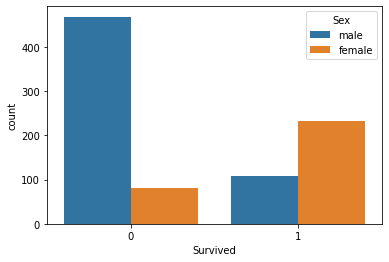

In [6]:
sns.countplot(x = 'Survived', data = train, hue = 'Sex')

More females survived than male

<AxesSubplot:xlabel='Survived', ylabel='count'>

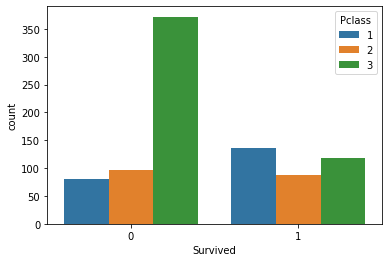

In [7]:
sns.countplot(x = 'Survived', data = train, hue = 'Pclass')

Many people from passenger class 3 did not survive while
More people from passenger class 1 survived

<AxesSubplot:ylabel='Frequency'>

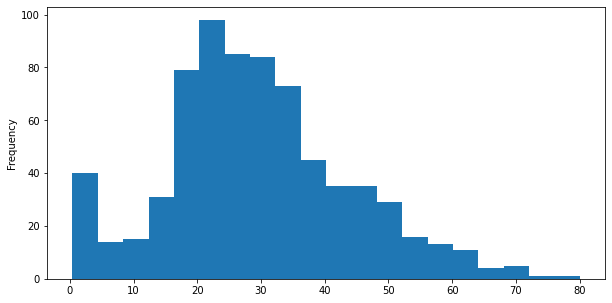

In [8]:
train['Age'].plot.hist(figsize = (10,5), bins = 20)

The total population has more young people 

<AxesSubplot:ylabel='Frequency'>

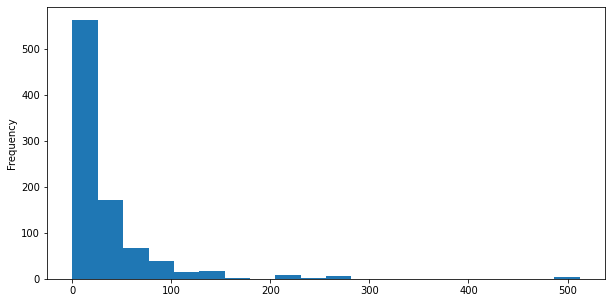

In [9]:
train['Fare'].plot.hist(bins = 20, figsize = (10, 5))

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


<AxesSubplot:xlabel='SibSp', ylabel='count'>

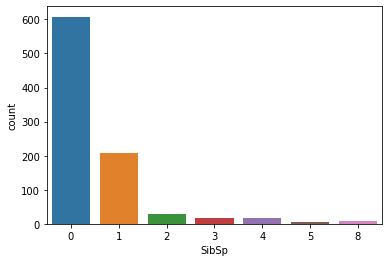

In [11]:
sns.countplot(x = 'SibSp', data = train)

<AxesSubplot:xlabel='Parch', ylabel='count'>

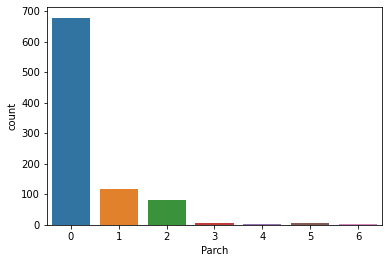

In [12]:
sns.countplot(x = 'Parch', data = train)

In [209]:
new_train = train.drop(["PassengerId","Name","Cabin","Ticket"],axis=1)

In [210]:
new_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [211]:

new_train.Age = new_train.Age.replace(np.nan,round((new_train.Age.mean()),2))

In [212]:
new_train.Embarked = new_train.Embarked.replace(np.nan,"S")

In [213]:
train2 = pd.get_dummies(new_train)
X = train2[train2.columns.difference(["Survived"])]
Y = train2["Survived"]

In [214]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

Z = pd.DataFrame(sc.fit_transform(X),columns=X.columns)

In [241]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(Z,Y, test_size=0.2,random_state=42)

In [154]:
df_train = pd.DataFrame(scX_train,columns=X.columns)
#df_test = pd.DataFrame(scX_test,columns=X.columns)

In [242]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train,Y_train)

y_pred = log_reg.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8100558659217877

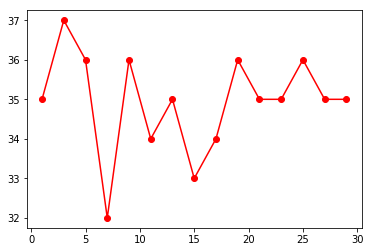

In [217]:
X_train,X_test,Y_train,Y_test = train_test_split(Z,Y, test_size=0.2,random_state=42)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
ms = []
for i in range(1,30,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    y_pred = knn.predict(X_test)
    cm = confusion_matrix(Y_test,y_pred)
    k = cm.sum()-sum(np.diag(cm))
    ms.append(k)
plt.plot(range(1,30,2),ms, marker="o",color="red")
plt.show()

In [218]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
y_pred = knn.predict(X_test)
accuracy_score(Y_test,y_pred)

0.8212290502793296

In [158]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
g = GaussianNB()
b = BernoulliNB()
m = MultinomialNB()

In [231]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2,random_state=42)

b.fit(X_train,Y_train)

pred2 = b.predict(X_test)


In [232]:
accuracy_score(Y_test,pred2)

0.7821229050279329

In [233]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

In [234]:
d_tree = DecisionTreeClassifier(criterion="gini",max_depth=3,min_samples_split=40,max_leaf_nodes=10)
d_tree.fit(X_train,Y_train)
y_pred = d_tree.predict(X_test)
accuracy_score(Y_test,y_pred)

0.7932960893854749

In [240]:
rf = RandomForestClassifier(n_estimators=100,max_depth=5,max_leaf_nodes=8,min_samples_split=5,criterion="entropy")
rf.fit(X_train,Y_train)
y_pred = rf.predict(X_test)
accuracy_score(Y_test,y_pred)

0.8044692737430168

In [102]:
ab = XGBClassifier(n_estimators=100,max_depth=5,max)
ab.fit(X_train,Y_train)
y_pred = ab.predict(X_test)
accuracy_score(Y_test,y_pred)

0.8212290502793296

In [120]:
from sklearn.model_selection import cross_val_score
cv = cross_val_score(estimator=rf,X=X_train,y=Y_train,cv=10,scoring="accuracy")
cv.mean()

0.8019427677174156

In [118]:
cv.std()

0.05324162436768845

In [238]:
from sklearn.model_selection import GridSearchCV
param = {"n_estimators":[70,80,90,100],"criterion":["gini","entropy"],"max_depth":[4,5,6],"min_samples_split":[2,3,4,5],
        "max_leaf_nodes":[3,4,5,6,7,8]}

grid = GridSearchCV(estimator=rf,param_grid=param,cv=10,n_jobs=-1)

grid.fit(X_train,Y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=80, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='w

In [239]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_leaf_nodes': 8,
 'min_samples_split': 5,
 'n_estimators': 100}

# =============

In [219]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [220]:
test.drop(["PassengerId","Name","Cabin","Ticket"],axis=1,inplace=True)

In [221]:
test.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [222]:
test.Age = test.Age.replace(np.nan,round((test.Age.mean()),2))

In [223]:
test.Fare = test.Fare.replace(np.nan,test.Fare.mean())

In [224]:
new_test = pd.get_dummies(test)
X2 = new_test
X2.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,0,1,0,1,0
1,3,47.0,1,0,7.0000,1,0,0,0,1
2,2,62.0,0,0,9.6875,0,1,0,1,0
3,3,27.0,0,0,8.6625,0,1,0,0,1
4,3,22.0,1,1,12.2875,1,0,0,0,1


In [226]:
new.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.873482,0.335035,-0.499470,-0.400248,-0.498407,-0.755929,0.755929,-0.568142,2.843757,-1.350676
1,0.873482,1.325572,0.616992,-0.400248,-0.513274,1.322876,-1.322876,-0.568142,-0.351647,0.740370
2,-0.315819,2.514217,-0.499470,-0.400248,-0.465088,-0.755929,0.755929,-0.568142,2.843757,-1.350676
3,0.873482,-0.259288,-0.499470,-0.400248,-0.483466,-0.755929,0.755929,-0.568142,-0.351647,0.740370
4,0.873482,-0.655503,0.616992,0.619896,-0.418471,1.322876,-1.322876,-0.568142,-0.351647,0.740370


In [225]:
new = pd.DataFrame(sc.fit_transform(X2),columns=X2.columns)

In [228]:
test["Survived"] = knn.predict(new)

In [230]:
final_prediction = test[["PassengerId","Survived"]]
final_prediction.to_csv("final_submission3.csv",index=False)

In [181]:
new["Survived"].value_counts()

0    324
1     94
Name: Survived, dtype: int64

In [229]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,0
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,0
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,1
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,0
